<a href="https://colab.research.google.com/github/natanrajch/DiploDatos/blob/main/Supervisado/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
# Importamos datos train
url = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/travel_insurance_prediction_train.csv'
data_train = pd.read_csv(url)
data_train.head()


,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [4]:
data_train['TravelInsurance'].unique() # Nuestro target ya esta codeado en valores de 0 y 1.

array([1, 0])

In [5]:
data_train['TravelInsurance'].value_counts() # Solo le dieron el seguro a 1/3 de los usuarios.

0    958
1    532
Name: TravelInsurance, dtype: int64

Tenemos 9 columnas y la columna target (si le dieron o no el seguro de viaje). De esas 9 columnas, eliminamos Customer ya que es un numero asignado a cada viajero. No solo no nos aporta ninguna info, sino que nos puede entorpecer las predicciones de nuestro algoritmo. 
Vamos a ir viendo las otras 8 columnas una a una, a ver como las podemos ir manipulando. 



In [6]:
# Importamos datos test
url = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/travel_insurance_prediction_test.csv'
data_test = pd.read_csv(url)
data_test.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


In [7]:
data_test.info() # En data test tenemos TODAS las features MENOS la variable target. Hay que hacer el mismo tratamiento de feature a ambos data sets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [8]:
# Vamos a eliminar la columna Customer de ambos data sets, porque no da absolutamente nada de info para el modelo
data_train.drop(columns=['Customer'], inplace=True) # Le ponemos el inplace True para que lo conserve en el df original.
data_test.drop(columns=['Customer'], inplace=True)

In [9]:
data_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,31,Government Sector,No,300000,7,0,No,No,0
4,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [10]:
# Vamos por las features mas sencillas. 
# Debemos pasar todo a valores numericos. Las columas GraduateOrNot, FrequentFlyer y EverTravelledAbroad hay que convertirlas a 0 y 1.
# Primero fijemonos si estas columnas tienen unicamente Yes y No como respuesta o si hay alguna otra respuesta.
print(data_train['GraduateOrNot'].value_counts())
print(data_test['GraduateOrNot'].value_counts())

Yes    1268
No      222
Name: GraduateOrNot, dtype: int64
Yes    424
No      73
Name: GraduateOrNot, dtype: int64


In [11]:
print(data_train['FrequentFlyer'].value_counts())
print(data_test['FrequentFlyer'].value_counts())

No     1173
Yes     317
Name: FrequentFlyer, dtype: int64
No     397
Yes    100
Name: FrequentFlyer, dtype: int64


In [12]:
print(data_train['EverTravelledAbroad'].value_counts())
print(data_test['EverTravelledAbroad'].value_counts())

No     1202
Yes     288
Name: EverTravelledAbroad, dtype: int64
No     405
Yes     92
Name: EverTravelledAbroad, dtype: int64


In [13]:
#Excelente, solo debemos aplicar un replace.
data_train['GraduateOrNot'] = data_train.GraduateOrNot.replace('Yes', 1).replace('No', 0)
data_test['GraduateOrNot'] = data_test.GraduateOrNot.replace('Yes', 1).replace('No', 0)
data_train['FrequentFlyer'] = data_train.FrequentFlyer.replace('Yes', 1).replace('No', 0)
data_test['FrequentFlyer'] = data_test.FrequentFlyer.replace('Yes', 1).replace('No', 0)
data_train['EverTravelledAbroad'] = data_train.EverTravelledAbroad.replace('Yes', 1).replace('No', 0)
data_test['EverTravelledAbroad'] = data_test.EverTravelledAbroad.replace('Yes', 1).replace('No', 0)

In [14]:
#Ahora pasamos estos valores 0,1 a numericos:
data_train['GraduateOrNot'] = data_train['GraduateOrNot'].astype(int)
data_test['GraduateOrNot'] = data_test['GraduateOrNot'].astype(int)
data_train['FrequentFlyer'] = data_train['FrequentFlyer'].astype(int)
data_test['FrequentFlyer'] = data_test['FrequentFlyer'].astype(int)
data_train['EverTravelledAbroad'] = data_train['EverTravelledAbroad'].astype(int)
data_test['EverTravelledAbroad'] = data_test['EverTravelledAbroad'].astype(int)

In [15]:
#Veamos si funciono, solo con una columna:
print(data_train.GraduateOrNot.value_counts())
print(data_test.GraduateOrNot.value_counts())

1    1268
0     222
Name: GraduateOrNot, dtype: int64
1    424
0     73
Name: GraduateOrNot, dtype: int64


In [16]:
data_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,33,Private Sector/Self Employed,1,550000,6,0,0,0,1
1,28,Private Sector/Self Employed,1,800000,7,0,1,0,0
2,31,Private Sector/Self Employed,1,1250000,4,0,0,0,0
3,31,Government Sector,0,300000,7,0,0,0,0
4,28,Private Sector/Self Employed,1,1250000,3,0,0,0,0


In [17]:
# Veamos la columna ChronicDiseases, si esta encodeada en 0 y 1 no habria que tocarla:
data_train['ChronicDiseases'].value_counts()

0    1079
1     411
Name: ChronicDiseases, dtype: int64

In [18]:
# Genial, no la tocamos, ChronicDiseases esta lista para meter al modelo tal cual. 
# Ahora veamos las features que van a llevar mas trabajo.
print(data_train['Employment Type'].value_counts())
print(data_test['Employment Type'].value_counts())

Private Sector/Self Employed    1057
Government Sector                433
Name: Employment Type, dtype: int64
Private Sector/Self Employed    360
Government Sector               137
Name: Employment Type, dtype: int64


In [19]:
# En esta variable podemos utilizar un OneHotEncoder, para convertir cada respuesta en un 0 o 1 (presente/ausente)
# Para el dataset de entrenamiento
from sklearn.preprocessing import OneHotEncoder 
onehot_encoder = OneHotEncoder() 
tipo_trabajo=onehot_encoder.fit_transform(data_train[['Employment Type']]).toarray()
tipo_trabajo=pd.DataFrame(tipo_trabajo, columns=onehot_encoder.categories_[0])
tipo_trabajo.head()

,Government Sector,Private Sector/Self Employed
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [20]:
# Para el dataset de test
tipo_trabajo=onehot_encoder.fit_transform(data_test[['Employment Type']]).toarray()
tipo_trabajo=pd.DataFrame(tipo_trabajo, columns=onehot_encoder.categories_[0])
tipo_trabajo.head()

,Government Sector,Private Sector/Self Employed
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [21]:
# Ahora necesito dropear la columna original y pegarle estas dos nuevas, en ambos data sets:
data_train = data_train.join(tipo_trabajo)
data_train = data_train.drop(['Employment Type'], axis = 1)

In [22]:
data_test = data_test.join(tipo_trabajo)
data_test = data_test.drop(['Employment Type'], axis = 1)

In [23]:
data_train.head()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector,Private Sector/Self Employed
0,33,1,550000,6,0,0,0,1,0.0,1.0
1,28,1,800000,7,0,1,0,0,0.0,1.0
2,31,1,1250000,4,0,0,0,0,1.0,0.0
3,31,0,300000,7,0,0,0,0,0.0,1.0
4,28,1,1250000,3,0,0,0,0,0.0,1.0


In [24]:
data_test.head()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Government Sector,Private Sector/Self Employed
0,29,1,1100000,4,0,0,0,0.0,1.0
1,28,1,750000,5,1,1,0,0.0,1.0
2,31,1,1500000,4,0,1,1,1.0,0.0
3,28,1,1400000,3,0,0,1,0.0,1.0
4,33,1,1500000,4,0,1,1,0.0,1.0


In [25]:
#Joya! Ahora las mas dificiles de encodear: Age, AnnualIncome y FamilyMembers.
# Podemos hacer un MinMaxScaler, o podemos hacer bins y dividir cada columna en "categorias" para luego aplicar un OneHot...
# O... algunas de estas features pueden tener un 'orden'. Por ejemplo, a mayor ingreso anual, mas probabilidad de contratar el seguro.
print(data_train['AnnualIncome'].sort_values()) # Los ingresos van entre 300.000 y 1.800.000
print(data_train['Age'].sort_values()) # Entre 25 y 35 anios.
print(data_train['FamilyMembers'].sort_values()) # Entre 2 y 9 miembros.

1008     300000
360      300000
652      300000
1135     300000
1138     300000
         ...   
1066    1750000
1258    1800000
1132    1800000
611     1800000
902     1800000
Name: AnnualIncome, Length: 1490, dtype: int64
479     25
273     25
116     25
281     25
1258    25
        ..
1016    35
1336    35
1399    35
52      35
311     35
Name: Age, Length: 1490, dtype: int64
1116    2
1231    2
814     2
1334    2
1229    2
       ..
228     9
170     9
83      9
1348    9
818     9
Name: FamilyMembers, Length: 1490, dtype: int64


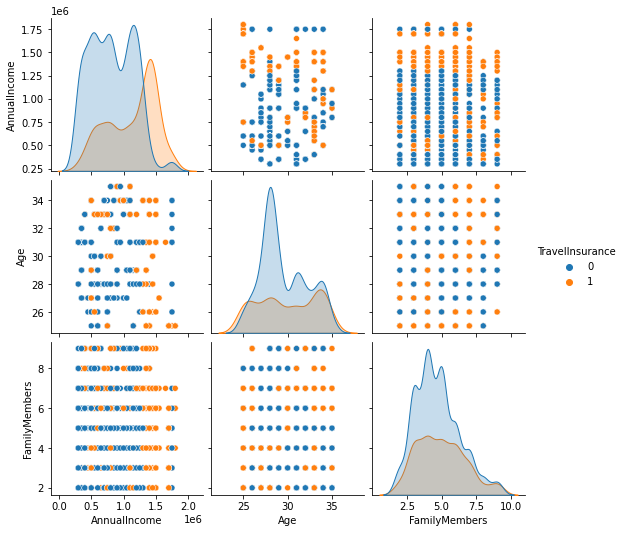

In [26]:
# Antes, veamos como dan estas variables con el target
import seaborn as sns
sns.pairplot(data_train[['AnnualIncome', 'Age', 'FamilyMembers', 'TravelInsurance']],
             hue = 'TravelInsurance')
# Por lo que se puede ver, la feature que mas aporta es AnnualIncome. El histograma de frecuencia esta corrido a la derecha. Es decir,
# Las personas con mayores ingresos anuales parecen contratar mas seguros que las de menores ingresos. El limite estaria cerca de los...
# 1.25 1e6 (o el millon 250 mil pesos de ingreso anual).
# En cuanto a las otras variables, podemos ver hay un pico de personas jovenes (25 a 30) que no suelen contrar seguro.
# El nro de miembros de familia no parece influir demasiado.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


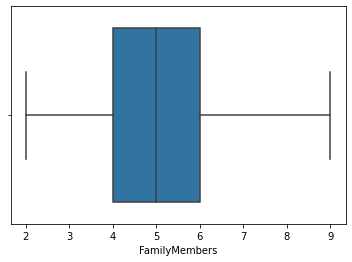

In [27]:
# Analicemos una por una....
# OUTLIERS
sns.boxplot(data_train['FamilyMembers'])
# Como era de esperar, las personas del data set tienen en mayor medida una familia con entre 4 y 6 miembros. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


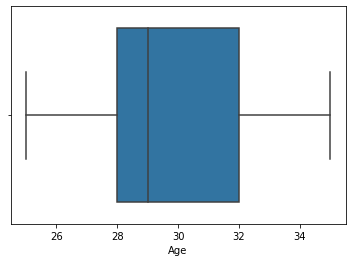

In [28]:
sns.boxplot(data_train['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


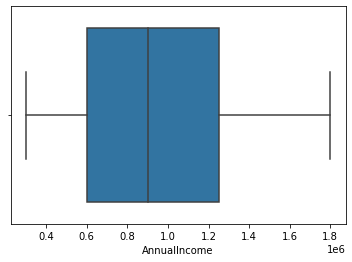

In [29]:
sns.boxplot(data_train['AnnualIncome'])